In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn

In [2]:
## select features from a dataframe's comment column
## used 'AVG PRESSURE' and 'AVG HHP'

def parse_info(df,dropped_col):
    avg_pressure = []
    avg_hhp = []
    df = df.fillna('0')
    for i in range(len(df)):
        info = df.iloc[i,1]
        if info.find('AVG. HHP') == -1:
            avg_pressure.append(info[info.find('AVG PRESSURE'):info.find('AVG HHP')])
            avg_hhp.append(info[info.find('AVG HHP'):info.find('MAX')])
        else:
            avg_pressure.append(info[info.find('AVG PRESSURE'):info.find('AVG. HHP')])
            avg_hhp.append(info[info.find('AVG. HHP'):info.find('MAX')])
    
    df['AVG PRESSURE (PSI)'] = avg_pressure
    df['AVG HHP'] = avg_hhp

    df['AVG PRESSURE (PSI)'] = df['AVG PRESSURE (PSI)'].str.replace(',','')
    df['AVG PRESSURE (PSI)'] = df['AVG PRESSURE (PSI)'].str.extract('(\d+)',expand=False)
    df['AVG PRESSURE (PSI)'] = df['AVG PRESSURE (PSI)'].apply(lambda x: float(x))

    df['AVG HHP'] = df['AVG HHP'].str.replace(',','')
    df['AVG HHP'] = df['AVG HHP'].str.extract('(\d+)',expand=False)
    df['AVG HHP'] = df['AVG HHP'].apply(lambda x: float(x))
    
    return df.drop(columns = dropped_col)

In [3]:
## imputation

def imputation(df):
    temp = df[['AVG PRESSURE (PSI)', 'AVG HHP']]
    temp = temp.apply(lambda col: col.fillna(col.mean()),axis=0)
    
    rig = df['RIG_ID'].to_frame()
    
    return pd.concat([rig,temp],axis=1)

# Stim_stage file

In [4]:
df_stim = pd.read_excel('gcbu_dnc_stim_stage.xlsx')
df1 = df_stim[['STIM_TREAT_REMARK','STG_REMARK','RIG_ID']]
df1_stim_treat = df1[['RIG_ID','STIM_TREAT_REMARK']]
df1_stg = df1[['RIG_ID','STG_REMARK']]

### This part analyzes the STIM_TREAT_REMARK comments for stim_stage file

In [5]:
df1_stim_treat.shape[0]

17721

In [6]:
## selected comment contents
df1_stim_treat = parse_info(df1_stim_treat,'STIM_TREAT_REMARK')
df1_stim_treat = imputation(df1_stim_treat)
df1_stim_treat

,RIG_ID,AVG PRESSURE (PSI),AVG HHP
0,RIG_ID - 2019000021,9919.0,16793.0
1,RIG_ID - 2019000082,10027.0,22069.0
2,RIG_ID - 2019000082,9358.0,12780.0
3,RIG_ID - 2019000098,7280.0,8618.0
4,RIG_ID - 2019000021,8298.0,13950.0
...,...,...,...
17716,RIG_ID - 2019000021,11086.0,22305.0
17717,RIG_ID - 2019000082,9695.0,18958.0
17718,RIG_ID - 2019000021,10778.0,16239.0
17719,RIG_ID - 2019000082,10098.0,18315.0


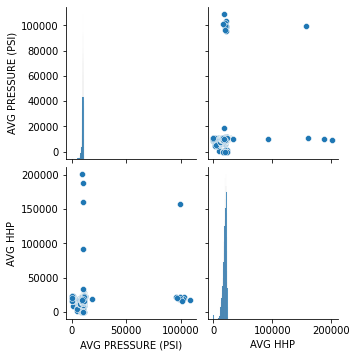

In [7]:
seaborn.pairplot(df1_stim_treat)
plt.show()

In [8]:
col1 = df1_stim_treat['AVG PRESSURE (PSI)']
col2 = df1_stim_treat['AVG HHP']
print('Analysis for stim_stage file, STIM_TREAT_REMARK column: \n')

df1_stim_treat.describe()

Analysis for stim_stage file, STIM_TREAT_REMARK column: 



,AVG PRESSURE (PSI),AVG HHP
count,17721.000000,17721.000000
mean,10064.931983,19313.955441
std,2593.123675,3809.480543
min,8.000000,0.000000
25%,9721.000000,17681.000000
50%,10140.000000,19839.000000
75%,10495.000000,21431.000000
max,109043.000000,201204.000000


### This part analyzes the STG_REMARK comments for stim_stage file

In [9]:
df1_stg.shape[0]

17721

In [10]:
df1_stg = parse_info(df1_stg,'STG_REMARK')
df1_stg = imputation(df1_stg)
df1_stg

,RIG_ID,AVG PRESSURE (PSI),AVG HHP
0,RIG_ID - 2019000021,9919.0,16793.0
1,RIG_ID - 2019000082,10027.0,22069.0
2,RIG_ID - 2019000082,9358.0,12780.0
3,RIG_ID - 2019000098,7280.0,8618.0
4,RIG_ID - 2019000021,8298.0,13950.0
...,...,...,...
17716,RIG_ID - 2019000021,11086.0,22305.0
17717,RIG_ID - 2019000082,9695.0,18958.0
17718,RIG_ID - 2019000021,10778.0,16239.0
17719,RIG_ID - 2019000082,10098.0,18315.0


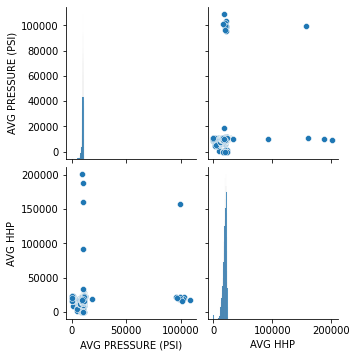

In [11]:
seaborn.pairplot(df1_stg)
plt.show()

In [12]:
col3 = df1_stg['AVG PRESSURE (PSI)']
col4 = df1_stg['AVG HHP']
print('Analysis for stim_stage file, STG_REMARK column: \n')

df1_stg.describe()

Analysis for stim_stage file, STG_REMARK column: 



,AVG PRESSURE (PSI),AVG HHP
count,17721.000000,17721.000000
mean,10064.931983,19313.955441
std,2593.123675,3809.480543
min,8.000000,0.000000
25%,9721.000000,17681.000000
50%,10140.000000,19839.000000
75%,10495.000000,21431.000000
max,109043.000000,201204.000000


# Recompletions file

In [13]:
df_recom = pd.read_excel('gcbu_dnc_recompletions.xlsx')
df2 = df_recom[['STIM_TREAT_REMARK','STG_REMARK','RIG_ID']]
df2_stim_treat = df2[['RIG_ID','STIM_TREAT_REMARK']]
df2_stg = df2[['RIG_ID','STG_REMARK']]

In [14]:
df2_stim_treat = df2_stim_treat.dropna().drop_duplicates()
df2_stg = df2_stg.dropna().drop_duplicates()

### This part analyzes the STIM_TREAT_REMARK comments for recompletions file

In [15]:
df2_stim_treat.shape[0]

1654

In [16]:
df2_stim_treat = parse_info(df2_stim_treat,'STIM_TREAT_REMARK')
df2_stim_treat = imputation(df2_stim_treat)
df2_stim_treat

,RIG_ID,AVG PRESSURE (PSI),AVG HHP
0,RIG_ID - 2019000082,9358.000000,12780.0
1,RIG_ID - 2019000098,7280.000000,8618.0
2,RIG_ID - 2019000084,8586.109228,7864.0
3,RIG_ID - 2019000098,8695.000000,11606.0
4,RIG_ID - 2019000098,9523.000000,16441.0
...,...,...,...
1649,RIG_ID - 2019000098,8928.000000,19547.0
1650,RIG_ID - 2019000098,8697.000000,18982.0
1651,RIG_ID - 2019000098,8929.000000,19545.0
1652,RIG_ID - 2019000098,9094.000000,19694.0


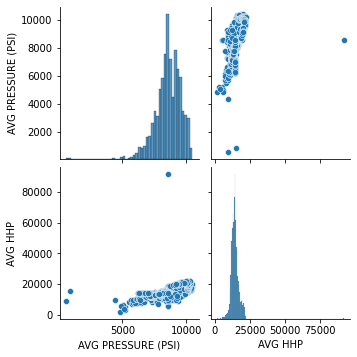

In [17]:
seaborn.pairplot(df2_stim_treat)
plt.show()

In [18]:
col5 = df2_stim_treat['AVG PRESSURE (PSI)']
col6 = df2_stim_treat['AVG HHP']
print('Analysis for recompletions file, STIM_TREAT_REMARK column: \n')

df2_stim_treat.describe()

Analysis for recompletions file, STIM_TREAT_REMARK column: 



,AVG PRESSURE (PSI),AVG HHP
count,1654.000000,1654.000000
mean,8586.109228,14415.330850
std,965.793424,3197.963223
min,595.000000,1820.000000
25%,8059.000000,12750.000000
50%,8608.000000,14180.000000
75%,9271.750000,15665.750000
max,10450.000000,91924.000000


### This part analyzes the STG_REMARK comments for recompletions file

In [19]:
df2_stg.shape[0]

1654

In [20]:
df2_stg = parse_info(df2_stg,'STG_REMARK')
df2_stg = imputation(df2_stg)
df2_stg

,RIG_ID,AVG PRESSURE (PSI),AVG HHP
0,RIG_ID - 2019000082,9358.000000,12780.0
1,RIG_ID - 2019000098,7280.000000,8618.0
2,RIG_ID - 2019000084,8586.109228,7864.0
3,RIG_ID - 2019000098,8695.000000,11606.0
4,RIG_ID - 2019000098,9523.000000,16441.0
...,...,...,...
1649,RIG_ID - 2019000098,8928.000000,19547.0
1650,RIG_ID - 2019000098,8697.000000,18982.0
1651,RIG_ID - 2019000098,8929.000000,19545.0
1652,RIG_ID - 2019000098,9094.000000,19694.0


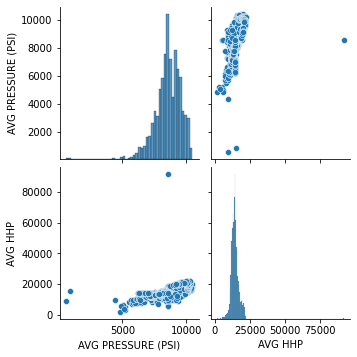

In [21]:
seaborn.pairplot(df2_stg)
plt.show()

In [22]:
col7 = df2_stg['AVG PRESSURE (PSI)']
col8 = df2_stg['AVG HHP']
print('Analysis for recompletions file, STG_REMARK column: \n')

df2_stg.describe()

Analysis for recompletions file, STG_REMARK column: 



,AVG PRESSURE (PSI),AVG HHP
count,1654.000000,1654.000000
mean,8586.109228,14415.330850
std,965.793424,3197.963223
min,595.000000,1820.000000
25%,8059.000000,12750.000000
50%,8608.000000,14180.000000
75%,9271.750000,15665.750000
max,10450.000000,91924.000000
